# Genetic Algorithms Academic Paper:

Link to Paper: https://arxiv.org/pdf/1711.08337.pdf

# High Level Explanation of the Paper:

The paper consists of two separate components:

# First Component:

The paper used genetic algorithms in order to tune the parameters of the evaluation function for the chess program.

The evaluation function is comprised of 35 different parameters.

Each set of these parameters can be represented as a chromosome (bit string) of 224 bits. Except for the parameters assigning the material values of a piece, all the other parameters are assigned a length of 6 bits per parameter. All the parameter values are initalised to random values before training. Pawn is constantly set to 100 so that there is a reference point for the other parameters.

In order to select which organisms survive for the next generation, we need a fitness metric. In previous papers, it has been shown that it is difficult to define this metric in terms of how the organisms perform against each other, as playing multiple full length games is incredibly time consuming. Note that this fitness metric is known as 'coevolution'.

Therefore, we choose our fitness metric to be the following:
**(Note: ply refers to a half move of a player in a chess game. So if a game starts e4, e5 - then 'e4' is 1-ply)**

**1)** Using a database of grandmaster-level games, select a list of positions and the move played in that position.

**2)** For each position, let the organism perform a 1-ply search and store the move selected by the organism.

**3)** Compare the move suggested by the organism with the actual move made by the player. The fitness of the organism will be the total number of moves where the organism's move is the same as the player's move.

1-ply searches can be done in a single millisecond. As such, we can use a large set of training positions.

After running the genetic algorithm ten times, we get a set of ten organisms that now achieve higher fitness. Because this set of organisms is small, it is now feasible to perform Coevolution on this set of organisms and make them play against each other.

After 50 generations, an optimal organism is produced. Note: We mean here optimal in reference to all the other organisms, not the usual algorithmic sense of the word.

Note that in this stage of the process, we use a basic alpha-beta search mechanism (untuned).

##Implementation:
(quoting directly from the paper)

"For our experiments, we used a database of 10,000 games of grandmasters rated above 2600 Elo, and randomly picked one position from each game. We picked winning positions only, i.e., positions where the side to move had ultimately won the game (e.g., if it was white’s turn to move, the game would be won eventually by white). Of these 10,000 positions, we selected 5,000 positions for training and 5,000 for testing.
In each generation, for each organism the algorithm translates its chromosome bit-string to a corresponding evaluation function. For each of the N test positions (in our case, N = 5, 000), it then performs a 1-ply search using the decoded evaluation function, and the best move returned from the search is compared to that of the grandmaster in the actual game. The move is deemed “correct” if it is the same as the move played by the grandmaster, and “incorrect” otherwise. The fitness of the organism is calculated as the square of the total number of correct moves."

"
Other than the special fitness function described above, we used a standard GA implementation with Gray coded chromosomes, fitness-proportional selection, uniform crossover, and elitism (the best organism is copied to the next generation). The following parameters are used by the algorithm:

population size = 100,
crossover rate = 0.75,
mutation rate = 0.005,
number of generations = 200.
"

#Second Component:

In addition, they used genetic algorithms to tune the parameters of a search mechanism for a chess program.

We can focus more on this section once the first section is implemented...



# Questions:

- I don't know what all of the chess heuristics mean. Perhaps we can replace the ones that we don't know.
Main ones I don't know:
pawn_advance_a, pawn_advance_b, weak_square_penalty, rook_attack_king_adj_file_abgh

- What form of mutation should we be using?
- Is it okay that we are using Python? A lot of the modern chess engines are coded in C, C++...



# Organism Parameters for Evaluation Function

Helpful link: https://www.chessprogramming.org/Main_Page

I've annotated the meaning of each of the parameters in the heuristic. Not sure means that I am not certain or do not know at all the meaning of the parameter.

In [1]:
# Values of each piece - trivial to implement
PAWN_VALUE = 0
KNIGHT_VALUE = 0
BISHOP_VALUE = 0
ROOK_VALUE = 0
QUEEN_VALUE = 0

# Pawn Properties
PAWN_ADVANCE_A = 0 # Not sure:
PAWN_ADVANCE_B = 0 # Not sure:
PASSED_PAWN_MULT = 0 # no opponent pawns in front of or adjacent to it
DOUBLED_PAWN_PENALTY = 0 # checks if we have two pawns on the same file
ISOLATED_PAWN_PENALTY = 0 # checks for isolated pawns (no own pawn on either side of it)
BACKWARD_PAWN_PENALTY = 0 # checks for backward pawns (pawns that are no longer defensible by own pawns as they are too advanced. And if pushed will be lost)
WEAK_SQUARE_PENALTY = 0  # Not sure:
PASSED_PAWN_ENEMY_KING_DIST = 0 # Checks if we have a passed pawn that cannot be caught by the enemy king

# Knight Properties
# Look at Evaluation of Pieces on Chess Wiki
KNIGHT_SQ_MULT = 0 # Not sure: Perhaps number of squares the knight can go to without being captured?
KNIGHT_OUTPOST_MULT = 0 # Checks for number of outposts.
# Outpost will be defined as a knight in the center or on the opponent's half of the board, defended by an own pawn, and no longer attackable by opponent pawns at all

# Bishop Properties
# Look at Evaluation of Pieces on Chess Wiki
BISHOP_MOBILITY = 0 # Refer to chess wiki for more sophisticated implementations. For the moment, we can use number of legal moves bishop can make.
BISHOP_PAIR = 0 # Checks if we still have both bishops

# Rook Properties
# Look at Evaluation of Pieces on Chess Wiki
ROOK_ATTACK_KING_FILE = 0 # Not sure: Checks if rook is on the same file as the king?
ROOK_ATTACK_KING_ADJ_FILE = 0 # Not sure: Checks if rook is on the adjacent file to the king?
ROOK_ATTACK_KING_ADJ_FILE_ABGH =0 # Not sure: Is this not the same thing as above?
ROOK_7TH_RANK = 0 # checks if the rook is on the 7th rank
ROOK_CONNECTED = 0 # checks if rooks defend each other
ROOK_MOBILITY = 0 # Refer to chess wiki for more sophisticated implementations. For the moment, we can use number of legal moves the rook can make.
ROOK_BEHIND_PASSED_PAWN = 0 # checks if the rook is placed behind a passed pawn (useful in endgames)
ROOK_OPEN_FILE = 0 # checks if the rook is on an open file
ROOK_SEMI_OPEN_FILE = 0 # checks if the rook is on a semi-open file
ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN = 0 # checks if the rook is attacking a weak pawn on an open file
ROOK_COLUMN_MULT = 0 # checks how many open files there are (I think)

# Queen Properties
# Look at Evaluation of Pieces on Chess Wiki
QUEEN_MOBILITY = 0 # Refer to chess wiki for more sophisticated implementations. For the moment, we can use number of legal moves the queen can make.

# King Properties (for next few comments assume kingside castling)
# Look at King Safety on chess wiki for a more detailed explanation

KING_NUMBER_FRIENDLY_PAWN = 0 # no pawn in front of the king (g-pawn)
KING_NUMBER_FRIENDLY_PAWN_ADJ = 0 # no pawn next to the king (f and h pawns)
KING_FRIENDLY_PAWN_ADVANCED1 = 0 # check if the kings pawns are advanced by at least one (f,g,h pawns)
KING_NUMBER_ENEMY_PAWN = 0 # opponent's g pawn is near our king
KING_NUMBER_ENEMY_PAWN_ADJ = 0 # opponent's f and h pawns are near our king
KING_PRESSURE_MULT = 0 # Not sure: Maybe this refers to the Wiki description of King Tropism (distance of king from black pieces, possibly weighted against piece value)

# The Plan:
1) Make the Evaluation Function \\
2) Make the Genetic Algorithm for Training. (Fitness function, encoding of chromosomes etc) \\
3) Evolve a set of organisms \\
4) Make the organisms compete against each other \\
5) Make a Minimax Function with Alpha Beta pruning that uses the optimal evaluation function

# Actual Coding:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# my files are in 'labs/lab0-0'
!cp -r /content/drive/MyDrive/AI_Project/* .
# restart the runtime
import os
os._exit(00)

Mounted at /content/drive


In [ ]:
! pip install chess -q

In [ ]:
import pandas as pd
import chess
import re
import numpy as np
import torch
import gc
from torch.utils.data import Dataset
import torch
import random
import copy

In [ ]:
import chess.pgn, os, itertools, numpy as np, csv, sys
from collections import defaultdict
from contextlib import ExitStack
from typing import Iterable
import chess.svg

# Preprocessing of Chess Data

Useful link for how to use the chess library:

https://python-chess.readthedocs.io/en/latest/

We can use a FEN format to represent each board state
We need a way for the Evaluator to take in a FEN format and output an evaluation.
As such, we need a way to preprocess the FEN format into an array.

The following function makes the matrix from the side to move's perspective (for either case the pawns move from row 0 to 7). We did this in order to make the evaluation function work for either side.

In [ ]:
# Takes in a fen string and outputs the matrix representing the chess board
# Note: fen to matrix makes a matrix from black's perspective (a8 is 00) if the fen is black's move
# Note: fen to matrix makes a matrix from white's perspective (a1 is 00) if the fen is white's move
def fen_to_matrix(fen):

  #fen = fen.split(' ')[0] # splicing out non-matrix part of fen
  fen = fen.split(' ')
  players_turn = fen[1]
  fen = fen[0]

  board_fen = [fen]
  split_board = board_fen [0].split ('/')
  a1_perspective_board = []
  a8_perspective_board = []

  for row in reversed(split_board) :
    new_row = []
    for value in row:
      if value == '0' or value == '1' or value == '2' or value == '3' or value == '4' or value == '5' or value == '6' or value == '7' or value == '8':
          for i in range(int(value)):
            new_row.append('-')
      else :
          new_row.append (value)
    a1_perspective_board.append(new_row)

  for row in split_board:
    new_row = []
    for value in row:
      if value == '0' or value == '1' or value == '2' or value == '3' or value == '4' or value == '5' or value == '6' or value == '7' or value == '8':
          for i in range(int(value)):
            new_row.append('-')
      else :
          new_row.append (value)
    a8_perspective_board.append(new_row)

  return np.array(a1_perspective_board), np.array(a8_perspective_board), players_turn

In [ ]:
fen_to_matrix('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1')

## Evaluation Function (Implementation):

We will make evaluative functions for each piece - starting with the king. Note that the input parameter board will refer to the above created matrix. It will be a numpy array.

Note: The board matrix is configured such that the square a1 is entry 00. The rows of the matrix are the rows of the board and the columns of the matrix are the columns of the board.

Note: Currently the evaluation is coded completely according to "white's perspective" (such that the side to move has row 1 as its first row).

Helpful tip: Iterating over the columns is equivalent to doing the transpose of the matrix and iterating over the rows!

Still need to implement quite a few of the functions. Also need to redo functions because I screwed up.

## Storage of The Pieces' Positions:

The storage will change depending on whose move it is. If it is white's move, then the black pieces are in the opponent's arrays. If it is black's move then the white pieces are in the opponent's arrays. This is done in order to get the evaluation function to work for either player.

In [ ]:
# returns tuple arrays for all the pieces and pawns
def find_positions_array(board, players_turn):
  rook_array = []
  bishops_array = []
  knights_array = []
  queen_array = []
  king_array = []
  pawns_array = []
  opponent_pawns_array = []
  opponent_king_array = []
  opponent_knights_array = []
  opponent_bishops_array = []
  opponent_queen_array = []
  opponent_rooks_array = []

  if players_turn == 'w':
    for i, row in enumerate(board):
      for j, square in enumerate(row):
        if square == 'R':
          rook_array.append((i,j))
        elif square == 'B':
          bishops_array.append((i,j))
        elif square == 'N':
          knights_array.append((i,j))
        elif square == 'Q':
          queen_array.append((i,j))
        elif square == 'K':
          king_array.append((i,j))
        elif square == 'P':
          pawns_array.append((i,j))
        elif square == 'p':
          opponent_pawns_array.append((i,j))
        elif square == 'k':
          opponent_king_array.append((i,j))
        elif square == 'b':
          opponent_bishops_array.append((i,j))
        elif square == 'n':
          opponent_knights_array.append((i,j))
        elif square == 'q':
          opponent_queen_array.append((i,j))
        elif square == 'r':
          opponent_rooks_array.append((i,j))
  else:
    for i, row in enumerate(board):
      for j, square in enumerate(row):
        if square == 'r':
          rook_array.append((i,j))
        elif square == 'b':
          bishops_array.append((i,j))
        elif square == 'n':
          knights_array.append((i,j))
        elif square == 'q':
          queen_array.append((i,j))
        elif square == 'k':
          king_array.append((i,j))
        elif square == 'p':
          pawns_array.append((i,j))
        elif square == 'P':
          opponent_pawns_array.append((i,j))
        elif square == 'K':
          opponent_king_array.append((i,j))
        elif square == 'B':
          opponent_bishops_array.append((i,j))
        elif square == 'N':
          opponent_knights_array.append((i,j))
        elif square == 'Q':
          opponent_queen_array.append((i,j))
        elif square == 'R':
          opponent_rooks_array.append((i,j))

  piece_array = []
  piece_array.append(rook_array)
  piece_array.append(bishops_array)
  piece_array.append(knights_array)
  piece_array.append(queen_array)
  piece_array.append(king_array)
  piece_array.append(pawns_array)
  piece_array.append(opponent_pawns_array)
  piece_array.append(opponent_king_array)
  piece_array.append(opponent_bishops_array)
  piece_array.append(opponent_knights_array)
  piece_array.append(opponent_queen_array)
  piece_array.append(opponent_rooks_array)

  return piece_array


# King:

In [ ]:
# returns number of pawns in front of the king
def king_number_friendly_pawn(board, king_array, pawns_array):

  num_friendly_pawns = 0
  king_position = king_array[0]
  for pawn_position in pawns_array:
    if pawn_position[1] == king_position[1]:
      num_friendly_pawns += 1

  return num_friendly_pawns

# no pawn next to the king (f and h pawns)
# At the moment we are returning number of pawns next to king...
def king_number_friendly_pawn_adj(board, king_array, pawns_array):
  num_side_pawns = 0
  king_position = king_array[0]
  for pawn_position in pawns_array:
    if (pawn_position[1]+1) == king_position[1]:
      num_side_pawns += 1
    elif (pawn_position[1]-1) == king_position[1]:
        num_side_pawns += 1

  return num_side_pawns

# check if the kings pawns are advanced by at least one (f,g,h pawns)
def king_friendly_pawn_advanced1(board, king_array, pawns_array):

  num_advanced_pawns = 0
  king_position = king_array[0]
  for pawn_position in pawns_array:
    if ((pawn_position[1]+1) == king_position[1]) and (abs(pawn_position[0]-king_position[0]) > 1):
      num_advanced_pawns += 1
    elif ((pawn_position[1]-1) == king_position[1]) and (abs(pawn_position[0]-king_position[0]) > 1):
        num_advanced_pawns += 1
    elif ((pawn_position[1]) == king_position[1]) and (abs(pawn_position[0]-king_position[0]) > 1):
        num_advanced_pawns += 1

  return num_advanced_pawns

# opponent's g pawn is near our king (should we do same value for every level of closeness? Chose kind of arbitrary closeness...)
def king_number_enemy_pawn(board, king_array, opponent_pawns_array):
  king_position = king_array[0]
  for opponent_pawn in opponent_pawns_array:
    if (opponent_pawn[1] == king_position[1]) and ((opponent_pawn[0]-king_position[0]) < 4) and ((opponent_pawn[0]-king_position[0]) > 0):
      return 1

  return 0

# opponent's f and h pawns are near our king (should we do same value for every level of closeness? Chose kind of arbitrary closeness...)
def king_number_enemy_pawn_adj(board, king_array, opponent_pawns_array):

  num_advanced_enemy_adj_pawns = 0
  king_position = king_array[0]
  for opponent_pawn in opponent_pawns_array:

    if ((opponent_pawn[1]+1) == king_position[1]) and ((opponent_pawn[0]-king_position[0]) < 4) and ((opponent_pawn[0]-king_position[0]) > 0):
      num_advanced_enemy_adj_pawns += 1
    elif ((opponent_pawn[1]-1) == king_position[1]) and ((opponent_pawn[0]-king_position[0]) < 4) and ((opponent_pawn[0]-king_position[0]) > 0):
        num_advanced_enemy_adj_pawns += 1

  return num_advanced_enemy_adj_pawns


# Distance of king from black pieces
# We will use Manhatten Distance in order to calculate this
# Currently we are not weighting according to piece value
def king_pressure_mult(board, king_array, opponent_pawns_array, opponent_bishops_array, opponent_knights_array, opponent_rooks_array, opponent_queen_array):
  king_pressure_score = 0
  king_position = king_array[0]
  if not len(opponent_queen_array) == 0:
    opponent_queen_position = opponent_queen_array[0]
    king_pressure_score += (abs(opponent_queen_position[0]- king_position[0]) + abs(opponent_queen_position[1]- king_position[1]))*9

  for opponent_pawn_position in opponent_pawns_array:
    king_pressure_score += (abs(opponent_pawn_position[0]- king_position[0]) + abs(opponent_pawn_position[1]- king_position[1]))*1

  for opponent_knights_position in opponent_knights_array:
    king_pressure_score += (abs(opponent_knights_position[0]- king_position[0]) + abs(opponent_knights_position[1]- king_position[1]))*3

  for opponent_bishops_position in opponent_bishops_array:
    king_pressure_score += (abs(opponent_bishops_position[0]- king_position[0]) + abs(opponent_bishops_position[1]- king_position[1]))*3

  for opponent_rooks_position in opponent_rooks_array:
    king_pressure_score += (abs(opponent_rooks_position[0]- king_position[0]) + abs(opponent_rooks_position[1]- king_position[1]))*5


  return king_pressure_score*0.1 # we weighted this function

# Queen:

In [ ]:
# Total number of moves the Queen can make
def queen_mobility(board, queen_array):

  num_rook_moves = rook_mobility(board, queen_array)
  num_bishop_moves = bishop_mobility(board, queen_array)

  return num_rook_moves + num_bishop_moves

# Pawn:

In [ ]:
# No idea what this is
def pawn_advance_a(board):

  return

# No idea what this is
def pawn_advance_b(board):

  return

# Not sure what this means or how to implement this
def weak_square_penalty(board):

  return

# counts the number of passed pawns we have on the board and outputs a list of all passed pawns
def passed_pawn_mult(board, pawns_array, opponent_pawns_array):

  num_passed_pawns = 0
  passed_pawns_array = []
  for pawn_position in pawns_array:
    is_passed_pawn = True
    for opponent_pawn_position in opponent_pawns_array:
      if pawn_position[1] == opponent_pawn_position[1]:
        if pawn_position[0] < opponent_pawn_position[0]:
          is_passed_pawn = False
          break
      elif pawn_position[1] - 1  == opponent_pawn_position[1]:
        if pawn_position[0] < opponent_pawn_position[0]:
          is_passed_pawn = False
          break
      elif pawn_position[1] + 1 == opponent_pawn_position[1]:
        if pawn_position[0] < opponent_pawn_position[0]:
          is_passed_pawn = False
          break

    if is_passed_pawn:
      num_passed_pawns += 1
      passed_pawns_array.append(pawn_position)

  return num_passed_pawns, passed_pawns_array

# counts the number of doubled pawns we have on the board
def doubled_pawn_penalty(board, pawns_array):

  num_doubled_pawn_pairs = 0
  for column_number in range(8):
    sum = 0
    for pawn in pawns_array:
      if pawn[1] == column_number:
        sum += 1

    if sum >= 2:
      num_doubled_pawn_pairs += 1

  return num_doubled_pawn_pairs

#counts the number of isolated pawns we have on the board
def isolated_pawn_penalty(board, pawns_array):

  num_isolated_pawns = 0
  isolated_pawns_array = []

  column_indices = [x[1] for x in pawns_array]
  for pawn_position in pawns_array:

    if not (pawn_position[1] - 1) in column_indices:
      if not (pawn_position[1] + 1) in column_indices:
        isolated_pawns_array.append(pawn_position)
        num_isolated_pawns += 1

  return num_isolated_pawns, isolated_pawns_array

# checks for backward pawns (pawns that are no longer defensible by own pawns as they are too advanced. And if pushed will be lost)
def backward_pawn_penalty(board, pawns_array, opponent_pawns_array):

  num_backward_pawns = 0
  backward_pawns_array = []

  for pawn_position in pawns_array:
    can_move_forward = False
    cant_be_defended = False
    can_be_taken = False

    if board[pawn_position[0]+1][pawn_position[1]] == '-':
      can_move_forward = True

    for defending_pawn_position in pawns_array:
      if (defending_pawn_position[1] == pawn_position[1] + 1) or (defending_pawn_position[1] == pawn_position[1] - 1):
        if defending_pawn_position[0] > pawn_position [0]:
          cant_be_defended = True
        else:
          cant_be_defended = False

    for opponent_pawn_position in opponent_pawns_array:
      if (opponent_pawn_position[1] == pawn_position[1] + 1) or (opponent_pawn_position[1] == pawn_position[1] - 1):
        if (opponent_pawn_position[0] == pawn_position[0] + 2):
          can_be_taken = True

    if can_move_forward and cant_be_defended and can_be_taken:
      num_backward_pawns += 1
      backward_pawns_array.append(defending_pawn_position)

  return num_backward_pawns, backward_pawns_array

# metric of how far away the king is from a passed pawn (manhatten distance). Should get argument from total passed pawns.
def passed_pawn_enemy_king_dist(board, passed_pawns_list, enemy_king_array):
  sum_manhatten_distances = 0
  enemy_king_position = enemy_king_array[0]
  for passed_pawn_position in passed_pawns_list:
    sum_manhatten_distances += (abs(passed_pawn_position[0]- enemy_king_position[0]) + abs(passed_pawn_position[1]- enemy_king_position[1]))

  return sum_manhatten_distances

# return number of pawns in the center (including pawn on c4):
def num_center_pawns(board, pawns_array):
  num_center_pawns = 0
  if (3,3) in pawns_array:
    num_center_pawns += 1
  if (3,4) in pawns_array:
    num_center_pawns += 1
  if (4,3) in pawns_array:
    num_center_pawns += 1
  if (4,4) in pawns_array:
    num_center_pawns += 1
  if (3,2) in pawns_array:
    num_center_pawns += 1

  return num_center_pawns

# Bishop


In [ ]:
# Total number of moves the bishop can make
def bishop_mobility(board, bishops_array):

  total_num_moves = 0

  for bishop_position in bishops_array:
    bishop_file = bishop_position[1]
    bishop_rank = bishop_position[0]

    current_position = (bishop_rank + 1, bishop_file + 1)
    while (current_position[0] <= 7) and (current_position[1] <= 7):
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] + 1, current_position[1] + 1)
      else:
        break

    current_position = (bishop_rank + 1, bishop_file - 1)
    while (current_position[0] <= 7) and (current_position[1] >= 0):
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] + 1, current_position[1] - 1)
      else:
        break

    current_position = (bishop_rank - 1, bishop_file + 1)
    while (current_position[0] >= 0) and (current_position[1] <= 7):
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] - 1, current_position[1] + 1)
      else:
        break

    current_position = (bishop_rank - 1, bishop_file - 1)
    while (current_position[0] >= 0) and (current_position[1] >= 0):
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] - 1, current_position[1] - 1)
      else:
        break

  return total_num_moves

# Checks if we still have two bishops (1 if True 0 if False)
def bishop_pair(bishops_array):
  if len(bishops_array) == 2:
        return 1
  return 0

# Knight

In [ ]:
# For the moment, number of possible knight moves
# We should change this to avoid cases where the knight can be taken next move
def knight_sq_mult(board, knights_array, bishops_array, pawns_array, queen_array, king_array, rooks_array):
  total_num_moves = 0

  for knight_position in knights_array:

    possible_moves = [(knight_position[0]+1, knight_position[1]+2),(knight_position[0]+1, knight_position[1]-2),
                      (knight_position[0]-1, knight_position[1]+2), (knight_position[0]-1, knight_position[1]-2),
                      (knight_position[0]+2, knight_position[1]+1), (knight_position[0]-2, knight_position[1]+1),
                       (knight_position[0]+2, knight_position[1]-1), (knight_position[0]-2, knight_position[1]-1)]

    for move in possible_moves:
      if (move[0] < 0 or move[0] > 7) or (move[1] < 0 or move[1] > 7):
        continue
      if (move in bishops_array) or (move in pawns_array) or (move in rooks_array) or (move in king_array) or (move in queen_array) or (move in knights_array):
        continue
      total_num_moves += 1

  return total_num_moves

# Checks for number of outposts.
# Outpost will be defined as a knight in the center or on the opponent's half of the board, defended by an own pawn, and no longer attackable by opponent pawns at all
# never implemented in terms of where on the board it is...
def knight_outpost_mult(board, knights_array, pawns_array, opponent_pawns_array):
  num_knight_outposts = 0

  #check if defended
  #check if can be attacked by enemy pawn
  for knight_position in knights_array:
    defended = False
    unattackable = True


    for pawn_position in pawns_array:
      if (pawn_position[0] == knight_position[0] - 1):
        if (pawn_position[1] == knight_position[1] + 1) or (pawn_position[1] == knight_position[1] - 1):
          defended = True

    for opponent_pawn_position in opponent_pawns_array:
      if (opponent_pawn_position[1] == knight_position[1] + 1) or (opponent_pawn_position[1] == knight_position[1] - 1):
          if opponent_pawn_position[0] > knight_position[0]:
            unattackable = False

    if defended and unattackable:
      num_knight_outposts += 1

  return  num_knight_outposts


# Rook


In [ ]:
#check what this is
def rook_attack_king_adj_file_abgh(board, rook_array):

  return

# check what this is (I think it's if the rook is on the file adjacent to the king)
def rook_attack_king_adj_file(board, rook_array, opponent_king_array):

  num_attacking_king = 0
  opponent_king_position = opponent_king_array[0]
  for rook_position in rook_array:
    if (opponent_king_position[1] == rook_position[1] + 1) or (opponent_king_position[1] == rook_position[1] - 1):
      num_attacking_king += 1

  return num_attacking_king

# checks if the rook is on the same file as the enemy king
def rook_attack_king_file(board, rook_array, opponent_king_array):
  num_attacking_king = 0
  opponent_king_position = opponent_king_array[0]
  for rook_position in rook_array:
    if opponent_king_position[1] == rook_position[1]:
      num_attacking_king += 1

  return num_attacking_king

# checks if the rook is on the 7th rank
def rook_7th_rank(board, rook_array):

  total_rooks = 0
  for rook_position in rook_array:
    if rook_position[0] == 6:
      total_rooks += 1

  return total_rooks

# checks if the rooks defend each other (0 if False, 1 if True)
def rook_connected(board, rook_array):

  if len(rook_array) < 2:
    return 0

  if (rook_array[0][0] == rook_array[1][0]) or (rook_array[0][1] == rook_array[1][1]):
    return 1

  return 0

#total number of squares that the rooks control
def rook_mobility(board, rook_array):
  total_num_moves = 0

  for rook_position in rook_array:
    rook_file = rook_position[1]
    rook_rank = rook_position[0]

    current_position = (rook_rank, rook_file + 1)
    while current_position[1] <= 7:
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (rook_rank, current_position[1] + 1)
      else:
        break

    current_position = (rook_rank, rook_file - 1)
    while current_position[1] >= 0:
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (rook_rank, current_position[1] - 1)
      else:
        break

    current_position = (rook_rank - 1, rook_file)
    while current_position[0] >= 0:
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] - 1, rook_file)
      else:
        break

    current_position = (rook_rank + 1, rook_file)
    while current_position[0] <= 7:
      if board[current_position[0]][current_position[1]] == '-':
        total_num_moves += 1
        current_position = (current_position[0] + 1, rook_file)
      else:
        break

  return total_num_moves

# checks if we have a rook placed behind a passed pawn (also in front of it actually)
def rook_behind_passed_pawn(board, rook_array, passed_pawns_list):
  num_rooks_behind_passed_pawns = 0
  for rook_position in rook_array:
    for passed_pawn_position in passed_pawns_list:
      if rook_position[1] == passed_pawn_position[1]:
         num_rooks_behind_passed_pawns += 1

  return num_rooks_behind_passed_pawns

# check if the rook is on an open file
def rook_open_file(board, rook_array, pawns_array, opponent_pawns_array):

  rooks_on_open_file = 0

  for rook_position in rook_array:
    is_open_file = True
    for pawn_position in pawns_array:
      if rook_position[1] == pawn_position[1]:
        is_open_file = False
    for opponent_pawn_position in opponent_pawns_array:
      if rook_position[1] == opponent_pawn_position[1]:
        is_open_file = False

    if is_open_file:
      rooks_on_open_file += 1

  return rooks_on_open_file

# check if rook is on a semi-open file (can have enemy pawn but not our own pawn)
def rook_semi_open_file(board, rook_array, pawns_array):

  rooks_on_semi_open_file = 0
  semi_open_file_array = []

  for rook_position in rook_array:
    is_semi_open_file = True
    for pawn_position in pawns_array:
      if rook_position[1] == pawn_position[1]:
        is_semi_open_file = False

    if is_semi_open_file:
      rooks_on_semi_open_file += 1
      semi_open_file_array.append(rook_position[1])

  return rooks_on_semi_open_file, semi_open_file_array

# checks if the rook is attacking a weak pawn (backward or isolated) on an open file
def rook_atck_weak_pawn_open_column(board, rook_array, backward_pawns_array, isolated_pawns_array, semi_open_file_array):

  num_rooks_attacking = 0
  for rook_position in rook_array:
    if rook_position[1] not in semi_open_file_array:
      continue
    for backward_pawn in backward_pawns_array:
      if backward_pawn[1] == rook_position[1]:
        num_rooks_attacking += 1
    for isolated_pawn in isolated_pawns_array:
      if isolated_pawn[1] == rook_position[1]:
        num_rooks_attacking += 1

  return num_rooks_attacking

# checks how many open files there are (I think)
def rook_column_mult(board, rook_array):

  num_open_files = 0
  for i, column in enumerate(board.T):
    is_open_file = True
    for j, square in enumerate(column):
      if square == 'p' or square == 'P':
              is_open_file = False
              break
    if is_open_file:
      num_open_files += 1

  return num_open_files

# Miscellanious

In [ ]:
# Check if we are checkmating the opponent
def check_checkmate(fen, players_side):
  board = chess.Board(fen)
  _, _, player_to_move = fen_to_matrix(fen)
  if board.is_checkmate() and not (player_to_move == players_side):
    return 100
  return 0

# We don't want to draw if we are ahead in material
def check_if_draw(fen, material_difference):
  board = chess.Board(fen)
  _, _, player_to_move = fen_to_matrix(fen)
  if board.can_claim_draw() and (material_difference >= 0):
    return 100
  return 0

# Piece Tables

The point of the piece table is to encourage sound development of all the pieces

In [ ]:
# We need to make these tables interpretable by our engine
# We will design functions for them
# This will form the basis of the evaluation function.

def check_knight_table(knights_array):

  knight_value_sum = 0
  knight_table = [[-50,-40,-30,-30,-30,-30,-40,-50],
  [-40,-20,  0,  5,  5,  0,-20,-40],
  [-30,  5, 10, 15, 15, 10,  5,-30],
  [-30,  0, 15, 20, 20, 15,  0,-30],
  [-30,  5, 15, 20, 20, 15,  5,-30],
  [-30,  0, 10, 15, 15, 10,  0,-30],
  [-40,-20,  0,  0,  0,  0,-20,-40],
  [-50,-40,-30,-30,-30,-30,-40,-50]]

  for knight in knights_array:
    knight_value_sum += knight_table[knight[0]][knight[1]]

  return knight_value_sum

def check_bishop_table(bishops_array):

  bishop_value_sum = 0
  bishop_table = [[-20,-10,-10,-10,-10,-10,-10,-20],
  [-10,  5,  0,  0,  0,  0,  5,-10],
  [-10, 10, 10, 10, 10, 10, 10,-10],
  [-10,  0, 10, 10, 10, 10,  0,-10],
  [-10,  5,  5, 10, 10,  5,  5,-10],
  [-10,  0,  5, 10, 10,  5,  0,-10],
  [-10,  0,  0,  0,  0,  0,  0,-10],
  [-20,-10,-10,-10,-10,-10,-10,-20]]

  for bishop in bishops_array:
    bishop_value_sum += bishop_table[bishop[0]][bishop[1]]

  return bishop_value_sum

def check_rook_table(rook_array):

  rook_value_sum = 0
  rook_table = [[0,  0,  0,  5,  5,  0,  0,  0],
    [-5,  0,  0,  0,  0,  0,  0, -5],
    [-5,  0,  0,  0,  0,  0,  0, -5],
    [-5,  0,  0,  0,  0,  0,  0, -5],
    [-5,  0,  0,  0,  0,  0,  0, -5],
    [-5,  0,  0,  0,  0,  0,  0, -5],
    [5, 10, 10, 10, 10, 10, 10,  5],
    [0,  0,  0,  0,  0,  0,  0,  0]]


  for rook in rook_array:
    rook_value_sum += rook_table[rook[0]][rook[1]]

  return rook_value_sum

def check_queen_table(queen_array):

  queen_value_sum = 0
  queen_table = [[-20,-10,-10, -5, -5,-10,-10,-20],
  [-10,  0,  5,  0,  0,  0,  0,-10],
  [-10,  5,  5,  5,  5,  5,  0,-10],
  [0,  0,  5,  5,  5,  5,  0, -5],
  [-5,  0,  5,  5,  5,  5,  0, -5],
  [-10,  0,  5,  5,  5,  5,  0,-10],
  [-10,  0,  0,  0,  0,  0,  0,-10],
  [-20,-10,-10, -5, -5,-10,-10,-20]]

  for queen in queen_array:
    queen_value_sum += queen_table[queen[0]][queen[1]]

  return queen_value_sum

# middlegame is determined by opponent material sum
def check_king_table(king_array, is_middlegame=True):

  king_value_sum = 0
  king_middlegame_table = [[20, 30, 10,  0,  -20, 10, 30, 20],
  [20, 20,  -20,  -20,  -20,  -20, 20, 20],
  [-10,-20,-20,-20,-20,-20,-20,-10],
  [-20,-30,-30,-40,-40,-30,-30,-20],
  [-30,-40,-40,-50,-50,-40,-40,-30],
  [-30,-40,-40,-50,-50,-40,-40,-30],
  [-30,-40,-40,-50,-50,-40,-40,-30],
  [-30,-40,-40,-50,-50,-40,-40,-30]]

  king_endgame_table = [[-50,-30,-30,-30,-30,-30,-30,-50],
  [-30,-30,  0,  0,  0,  0,-30,-30],
  [-30,-10, 20, 30, 30, 20,-10,-30],
  [-30,-10, 30, 40, 40, 30,-10,-30],
  [-30,-10, 30, 40, 40, 30,-10,-30],
  [-30,-10, 20, 30, 30, 20,-10,-30],
  [-30,-20,-10,  0,  0,-10,-20,-30],
  [-50,-40,-30,-20,-20,-30,-40,-50]]

  if is_middlegame:
    king_value_sum += king_middlegame_table[king_array[0][0]][king_array[0][1]]
  else:
    king_value_sum += king_endgame_table[king_array[0][0]][king_array[0][1]]

  return king_value_sum

def check_pawn_table(pawns_array):

  pawn_value_sum = 0
  pawn_table = [[0,  0,  0,  0,  0,  0,  0,  0],
  [5, 10, 10,-20,-20, 10, 10,  5],
  [5, -5,-10,  0,  0,-10, -5,  5],
  [0,  0,  0, 20, 20,  0,  0,  0],
  [5,  5, 10, 25, 25, 10,  5,  5],
  [10, 10, 20, 30, 30, 20, 10, 10],
  [50, 50, 50, 50, 50, 50, 50, 50],
  [0,  0,  0,  0,  0,  0,  0,  0]]

  for pawn in pawns_array:
    pawn_value_sum += pawn_table[pawn[0]][pawn[1]]

  return pawn_value_sum



# Evaluation Functions Testing Ground

It is important that we test our evaluation function by importing different FENS (different positions) and making sure that each of the functions classify the position correctly.


We can create different FENS easily using the following link: https://lichess.org/editor

In [ ]:
board, a8_matrix, players_turn = fen_to_matrix('r1bqkb1r/pp4pp/1pnN3p/1pPpN3/3Pn3/6P1/PPP3PP/R1BQKB1R w KQkq - 0 1')
rook_array, bishops_array, knights_array, queen_array, king_array, pawns_array, opponent_pawns_array, opponent_king_array, opponent_bishops_array, opponent_knights_array, opponent_queen_array, opponent_rooks_array = find_positions_array(board, players_turn)

## Rook Function Testing

In [ ]:
result1 = rook_attack_king_adj_file(board, rook_array, opponent_king_array)
result2 = rook_attack_king_file(board, rook_array, opponent_king_array)
result3 = rook_7th_rank(board, rook_array)
result4 = rook_connected(board, rook_array)
result5 = rook_mobility(board, rook_array)
#result6 = rook_behind_passed_pawn(board, rook_array, passed_pawns_list)
result7 = rook_open_file(board, rook_array, pawns_array, opponent_pawns_array)
result8 = rook_semi_open_file(board, rook_array, pawns_array)
#result9 = rook_atck_weak_pawn_open_column(board, rook_array, backward_pawns_array, isolated_pawns_array, semi_open_file_array)
result10 = rook_column_mult(board, rook_array)

print(" Function: rook_attack_king_adj_file         Result:  ", result1) # working
print(" Function: rook_attack_king_file             Result:  ", result2) # working
print(" Function: rook_7th_rank                     Result:  ", result3) # working
print(" Function: rook_connected                    Result:  ", result4) # working
print(" Function: rook_mobility                     Result:  ", result5) # working but doesn't count taking an opponent as mobility
#print(" Function: rook_behind_passed_pawn           Result:  ", result6) # won't work because we need this from black's perspective
print(" Function: rook_open_file                    Result:  ", result7) # working
print(" Function: rook_semi_open_file               Result:  ", result8) # working
#print(" Function: rook_atck_weak_pawn_open_column   Result:  ", result9) # won't work because we need this from black's perspective
print(" Function: rook_column_mult                  Result:  ", result10) # working

## King Function Testing

In [ ]:
result11 = king_pressure_mult(board, king_array, opponent_pawns_array, opponent_bishops_array, opponent_knights_array, opponent_rooks_array, opponent_queen_array)
result12 = king_number_enemy_pawn_adj(board, king_array, opponent_pawns_array)
result13 = king_number_enemy_pawn(board, king_array, opponent_pawns_array)
result14 = king_friendly_pawn_advanced1(board, king_array, pawns_array)
result15 = king_number_friendly_pawn_adj(board, king_array, pawns_array)
result16 = king_number_friendly_pawn(board, king_array, pawns_array)
#result_negative_17 = check_can_castle(board, board.turn())

print(" Function: king_pressure_mult              Result:  ", result11) # working (not weighted for the moment)
print(" Function: king_number_enemy_pawn_adj          Result:  ", result12) # working (0 if none, eitherwise prints num enemy pawns)
print(" Function: king_number_enemy_pawn              Result:  ", result13) # working (0 if none, eitherwise prints num enemy pawns)
print(" Function: king_friendly_pawn_advanced1    Result:  ", result14) # working (sees pawns as advanced if king is in front of them)
print(" Function: king_number_friendly_pawn_adj       Result:  ", result15) # working in the sense that we are returning what pawns are next to the king
print(" Function: king_number_friendly_pawn           Result:  ", result16) # working

## Queen Function Testing

In [ ]:
result17 = queen_mobility(board, queen_array)

print(" Function: queen_mobility    Result:  ", result17) # working but doesn't count taking an opponent as mobility

## Pawn Function Testing

In [ ]:
result18, passed_pawns_list = passed_pawn_mult(board, pawns_array, opponent_pawns_array)
result19 = doubled_pawn_penalty(board, pawns_array)
result20 = isolated_pawn_penalty(board, pawns_array)
result21 = backward_pawn_penalty(board, pawns_array, opponent_pawns_array)
result22 = passed_pawn_enemy_king_dist(board, passed_pawns_list, opponent_king_array)
result_negative_23 = num_center_pawns(board, pawns_array)

print(" Function: passed_pawn_mult             Result:  ", result18) # working
print(" Function: doubled_pawn_penalty         Result:  ", result19) # working (note for tripled pawns counts as double - fine)
print(" Function: isolated_pawn_penalty        Result:  ", result20) # working (isolated doubled pawns counted as two - fine)
print(" Function: backward_pawn_penalty        Result:  ", result21) # working
print(" Function: passed_pawn_enemy_king_dist  Result:  ", result22) # working
print(" Function: number of center pawns       Result:  ", result_negative_23) # working

## Knight Function Testing

In [ ]:
result23 = knight_sq_mult(board, knights_array, bishops_array, pawns_array, queen_array, king_array, rook_array)
result24 = knight_outpost_mult(board, knights_array, pawns_array, opponent_pawns_array)

print(" Function: knight_sq_mult        Result:  ", result23) # working
print(" Function: knight_outpost_mult   Result:  ", result24) # working

## Bishop Function Testing

We will be tuning this one first

In [ ]:

result25 = bishop_pair(bishops_array)
result26 = bishop_mobility(board, bishops_array)

print(" Function: bishop_pair       Result:  ", result25) # working
print(" Function: bishop_mobility   Result:  ", result26) # working

## Miscellanious Function Testing


In [ ]:
fen = '1k1R4/ppp5/8/8/8/8/7q/K7 b - - 0 1'
result27 = check_checkmate(fen, 'b') # This needs the board of the FEN.


print("Function: Checkmate Result: ", result27)

## Piece Table Function Testing

In [ ]:
fen = '1k1r4/8/8/4p3/3n4/8/8/8 w - - 0 1'
board, a8_matrix, players_turn = fen_to_matrix(fen)
rook_array, bishops_array, knights_array, queen_array, king_array, pawns_array, opponent_pawns_array, opponent_king_array, opponent_bishops_array, opponent_knights_array, opponent_queen_array, opponent_rooks_array = find_positions_array(a8_matrix, 'b')

result28 = check_knight_table(knights_array)
result29 = check_bishop_table(bishops_array)
result30 = check_rook_table(rook_array)
result31 = check_queen_table(queen_array)
print(king_array)
result32 = check_king_table(king_array, is_middlegame=True)
result33 = check_pawn_table(pawns_array)

print("Function: check_knight_table: ", result28)
print("Function: check_bishop_table: ", result29)
print("Function: check_rook_table: ", result30)
print("Function: check_queen_table: ", result31)
print("Function: check_king_table: ", result32)
print("Function: check_pawn_table: ", result33)

# Parameters of Organism



In [ ]:
# Values of each piece
class Piece_Value_Parameters:
  PAWN_VALUE = 0
  KNIGHT_VALUE = 0
  BISHOP_VALUE = 0
  ROOK_VALUE = 0
  QUEEN_VALUE = 0

# Pawn Properties
class Pawn_Parameters:
  #PAWN_ADVANCE_A = 0
  #PAWN_ADVANCE_B = 0
  PASSED_PAWN_MULT = 0
  DOUBLED_PAWN_PENALTY = 0
  ISOLATED_PAWN_PENALTY = 0
  BACKWARD_PAWN_PENALTY = 0
  #WEAK_SQUARE_PENALTY = 0
  PASSED_PAWN_ENEMY_KING_DIST = 0
  NUM_CENTER_PAWNS = 0

# Knight Properties
class Knight_Parameters:
  KNIGHT_SQ_MULT = 0
  KNIGHT_OUTPOST_MULT = 0

# Bishop Properties
class Bishop_Parameters:
  BISHOP_MOBILITY = 0
  BISHOP_PAIR = 0

# Rook Properties
class Rook_Parameters:
  ROOK_ATTACK_KING_FILE = 0
  ROOK_ATTACK_KING_ADJ_FILE = 0
  #ROOK_ATTACK_KING_ADJ_FILE_ABGH =0
  ROOK_7TH_RANK = 0
  ROOK_CONNECTED = 0
  ROOK_MOBILITY = 0
  ROOK_BEHIND_PASSED_PAWN = 0
  ROOK_OPEN_FILE = 0
  ROOK_SEMI_OPEN_FILE = 0
  ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN = 0
  ROOK_COLUMN_MULT = 0

# Queen Properties
class Queen_Parameters:
  QUEEN_MOBILITY = 0

# King Properties
class King_Parameters:
  KING_NUMBER_FRIENDLY_PAWN = 0
  KING_NUMBER_FRIENDLY_PAWN_ADJ = 0
  KING_FRIENDLY_PAWN_ADVANCED1 = 0
  KING_NUMBER_ENEMY_PAWN = 0
  KING_NUMBER_ENEMY_PAWN_ADJ = 0
  KING_PRESSURE_MULT = 0

class Miscellanious_Parameters:
  CHECKMATE = 0
  DRAW = 0

class Piece_Table_Parameters:
  PAWN_PIECE_TABLE = 0
  KNIGHT_PIECE_TABLE = 0
  BISHOP_PIECE_TABLE = 0
  ROOK_PIECE_TABLE = 0
  QUEEN_PIECE_TABLE = 0
  KING_PIECE_TABLE = 0

class Parameters:
  def __init__(self, Piece_Value_Parameters, Pawn_Parameters, Knight_Parameters, Bishop_Parameters, Rook_Parameters, Queen_Parameters, King_Parameters, Miscellanious_Parameters, Piece_Table_Parameters):

    self.Piece_Value_Parameters = Piece_Value_Parameters
    self.Pawn_Parameters = Pawn_Parameters
    self.Knight_Parameters = Knight_Parameters
    self.Bishop_Parameters = Bishop_Parameters
    self.Rook_Parameters = Rook_Parameters
    self.Queen_Parameters = Queen_Parameters
    self.King_Parameters = King_Parameters
    self.Miscellanious_Parameters = Miscellanious_Parameters
    self.Piece_Table_Parameters = Piece_Table_Parameters

# Final Evaluation Function:
Now, we need to combine everything together to make a single Evaluation function.

In [ ]:
# There is some weird minimax stuff goin on here.
def evaluate(fen, Parameters, maximizing_player=True):

  # Note: fen to matrix makes a matrix from black's perspective (a8 is 00) if the fen is black's move
  # Note: fen to matrix makes a matrix from white's perspective (a1 is 00) if the fen is white's move

  a1_matrix, a8_matrix, opponents_turn = fen_to_matrix(fen)

  players_turn = 'w'
  if opponents_turn == 'w':
    players_turn = 'b'

  if players_turn == 'w':
    players_matrix = a1_matrix
    opponents_matrix = a8_matrix
  else:
    players_matrix = a8_matrix
    opponents_matrix = a1_matrix

  piece_array = find_positions_array(players_matrix, players_turn)
  our_score = evaluate_one_side(fen, players_matrix, Parameters, piece_array, players_turn)
  #print("Our Score: ", our_score)

  opponents_piece_array = find_positions_array(opponents_matrix, opponents_turn)
  opponents_score = evaluate_one_side(fen, opponents_matrix, Parameters, opponents_piece_array, opponents_turn)
  #print("Opponent's score: ", opponents_score)
  if(not maximizing_player):
    return (opponents_score - our_score)
  return (our_score - opponents_score)

In [ ]:
# Add for good things
# Subtract for bad things

# Got rid of 7th rank and num open file
def evaluate_one_side(fen, board, Parameters, piece_array, players_turn):
  score = 0

  rook_array = piece_array[0]
  bishops_array = piece_array[1]
  knights_array = piece_array[2]
  queen_array = piece_array[3]
  king_array = piece_array[4]
  pawns_array = piece_array[5]
  opponent_pawns_array= piece_array[6]
  opponent_king_array= piece_array[7]
  opponent_bishops_array = piece_array[8]
  opponent_knights_array = piece_array[9]
  opponent_queen_array = piece_array[10]
  opponent_rooks_array = piece_array[11]

  # Material Evaluation
  our_material_value = len(rook_array)*5+len(bishops_array)*3+len(knights_array)*3+len(queen_array)*9+len(pawns_array)
  opponent_material_value = len(opponent_rooks_array)*5+len(opponent_bishops_array)*3+len(opponent_knights_array)*3+len(opponent_queen_array)*9+len(opponent_pawns_array)
  material_difference = our_material_value - opponent_material_value
  is_middlegame = True
  if opponent_material_value < 10:
    is_middlegame = False

  # Piece Evaluation
  score += Parameters.Piece_Value_Parameters.KNIGHT_VALUE * len(knights_array)
  score += Parameters.Piece_Value_Parameters.ROOK_VALUE * len(rook_array)
  score += Parameters.Piece_Value_Parameters.BISHOP_VALUE * len(bishops_array)
  score += Parameters.Piece_Value_Parameters.PAWN_VALUE * len(pawns_array)
  score += Parameters.Piece_Value_Parameters.QUEEN_VALUE * len(queen_array)

  # Pawn Evaluation:
  passed_pawn_result, passed_pawns_list = passed_pawn_mult(board, pawns_array, opponent_pawns_array)
  score += passed_pawn_result*Parameters.Pawn_Parameters.PASSED_PAWN_MULT
  score -= doubled_pawn_penalty(board, pawns_array)*Parameters.Pawn_Parameters.DOUBLED_PAWN_PENALTY
  isolated_pawn_result, isolated_pawns_array = isolated_pawn_penalty(board, pawns_array)
  bp_pawn_result, backward_pawns_array = backward_pawn_penalty(board, pawns_array, opponent_pawns_array)
  score -= isolated_pawn_result*Parameters.Pawn_Parameters.ISOLATED_PAWN_PENALTY
  score -= bp_pawn_result*Parameters.Pawn_Parameters.BACKWARD_PAWN_PENALTY
  score += passed_pawn_enemy_king_dist(board, passed_pawns_list, opponent_king_array)*Parameters.Pawn_Parameters.PASSED_PAWN_ENEMY_KING_DIST # need to be careful about this one's weighting maybe
  score += num_center_pawns(board, pawns_array)*Parameters.Pawn_Parameters.NUM_CENTER_PAWNS

  # Rook Evaluation:
  score  += rook_attack_king_adj_file(board, rook_array, opponent_king_array)*Parameters.Rook_Parameters.ROOK_ATTACK_KING_ADJ_FILE
  score  += rook_attack_king_file(board, rook_array, opponent_king_array)*Parameters.Rook_Parameters.ROOK_ATTACK_KING_FILE
  score  += rook_connected(board, rook_array)*Parameters.Rook_Parameters.ROOK_CONNECTED
  score  += rook_mobility(board, rook_array)*Parameters.Rook_Parameters.ROOK_MOBILITY
  score  += rook_behind_passed_pawn(board, rook_array, passed_pawns_list)*Rook_Parameters.ROOK_BEHIND_PASSED_PAWN
  score  += rook_open_file(board, rook_array, pawns_array, opponent_pawns_array)*Parameters.Rook_Parameters.ROOK_OPEN_FILE
  semi_open_file_result, semi_open_file_array =  rook_semi_open_file(board, rook_array, pawns_array)
  score  +=  semi_open_file_result*Parameters.Rook_Parameters.ROOK_SEMI_OPEN_FILE
  score  += rook_atck_weak_pawn_open_column(board, rook_array, backward_pawns_array, isolated_pawns_array, semi_open_file_array)*Rook_Parameters.ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN

  # King Evaluation:
  score -= king_pressure_mult(board, king_array, opponent_pawns_array, opponent_bishops_array, opponent_knights_array, opponent_rooks_array, opponent_queen_array)*Parameters.King_Parameters.KING_PRESSURE_MULT
  score -= king_number_enemy_pawn_adj(board, king_array, opponent_pawns_array)*Parameters.King_Parameters.KING_NUMBER_ENEMY_PAWN_ADJ
  score -= king_number_enemy_pawn(board, king_array, opponent_pawns_array)*Parameters.King_Parameters.KING_NUMBER_ENEMY_PAWN
  score -= king_friendly_pawn_advanced1(board, king_array, pawns_array)*Parameters.King_Parameters.KING_FRIENDLY_PAWN_ADVANCED1
  score += king_number_friendly_pawn_adj(board, king_array, pawns_array)*Parameters.King_Parameters.KING_NUMBER_FRIENDLY_PAWN_ADJ
  score += king_number_friendly_pawn(board, king_array, pawns_array)*Parameters.King_Parameters.KING_NUMBER_FRIENDLY_PAWN

  # Queen Evaluation:
  score += queen_mobility(board, queen_array)*Parameters.Queen_Parameters.QUEEN_MOBILITY

  # Knight Evaluation:
  score += knight_sq_mult(board, knights_array, bishops_array, pawns_array, queen_array, king_array, rook_array)*Parameters.Knight_Parameters.KNIGHT_SQ_MULT
  score += knight_outpost_mult(board, knights_array, pawns_array, opponent_pawns_array)*Parameters.Knight_Parameters.KNIGHT_OUTPOST_MULT

  # Bishop Evaluation:
  score += bishop_pair(bishops_array)*Parameters.Bishop_Parameters.BISHOP_PAIR
  score += bishop_mobility(board, bishops_array)*Parameters.Bishop_Parameters.BISHOP_MOBILITY

  # Miscellanious Evalutation:
  score += check_checkmate(fen, players_turn)*Parameters.Miscellanious_Parameters.CHECKMATE
  #score -= check_if_draw(fen, material_difference)*Parameters.Miscellanious_Parameters.DRAW

  # Piece Table Evaluation
  score += check_knight_table(knights_array)*Parameters.Piece_Table_Parameters.KNIGHT_PIECE_TABLE
  score += check_bishop_table(bishops_array)*Parameters.Piece_Table_Parameters.BISHOP_PIECE_TABLE
  score += check_rook_table(rook_array)*Parameters.Piece_Table_Parameters.ROOK_PIECE_TABLE
  score += check_queen_table(queen_array)*Parameters.Piece_Table_Parameters.QUEEN_PIECE_TABLE
  score += check_king_table(king_array, is_middlegame)*Parameters.Piece_Table_Parameters.KING_PIECE_TABLE
  score += check_pawn_table(pawns_array)*Parameters.Piece_Table_Parameters.PAWN_PIECE_TABLE

  return score

# Predictor Function:

Now we will use the Evaluation Function to build a function that predicts the next move of the chess game. This will eventually be used to calculate the overall fitness of the organism

Helpful link: https://python-chess.readthedocs.io/en/latest/

In [ ]:
# Gets best move out of all possible moves using evaluation function
def predict(fen, Parameters):

  board = chess.Board(fen)
  legal_moves = list(board.legal_moves)
  current_best_move = list(board.legal_moves)[0]
  current_best_evaluation = -np.inf
  new_board = board

  for move in legal_moves:
    new_board = copy.deepcopy(board) # need to make a deep copy? Maybe can just be copy?
    new_board.push(move)
    move_evaluation = evaluate(new_board.fen(), Parameters)

    if move_evaluation > current_best_evaluation:
      current_best_evaluation = move_evaluation
      current_best_move = move

  return current_best_move

# Genetic Algorithm for Evaluation:

We will now generate a random initial population of all of the parameters.
We will then encode each of the parameters as a gray encoded binary string.
We will then iterate over a certain number of generations, introducing mutation and crossover in each generation. We will also select the "mating procedure" which chooses which chromosomes perform crossover (generally chromosomes with greater fitness functions).

In order to understand this better, it is worth consulting the following link:
https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_mutation.htm

The evaluation function is comprised of 35 different parameters.
Each chromosome will consist of 34 parameters as a pawn is a reference point (always set to 100).
Each parameter in the chromosome will be a bit string of length 6. Each piece value will be a bit string of length 11.
This adds up to the 224 bit chromosome length described in the paper.

For the moment we are only using 29 parameters. Also everything is from the perspective of the white pieces. (I wrote this a while ago and am not certain what it now means "perspective of the white pieces).

In [ ]:
population_size = 100
crossover_rate = 0.75
mutation_rate = 0.005
number_of_generations = 200
elitism_rate = 0.1
bit_string_size = 244

# Calculating Fitness of Each Organism:

We need to decode each binary string (which we will take to be gray code) into its parameters.

In [ ]:
# converts the gray code string into decimals
def gray_to_decimal(gray_code):
    binary = gray_code[0]
    for i in range(1, len(gray_code)):
        if gray_code[i] == '1':
            if binary[-1] == '0':
                binary += '1'
            else:
                binary += '0'
        else:
            binary += binary[-1]
    return int(binary, 2)


# Converts gray code bit string into decimal parameters
# First 44 elements of bit string are piece values, rest are 6 bit of other parameters

# Need to update this function
def bit_to_params(bit_string):

  # done
  piece_values = Piece_Value_Parameters()
  piece_values.PAWN_VALUE = 100
  piece_values.KNIGHT_VALUE = gray_to_decimal(bit_string[0:11])
  piece_values.BISHOP_VALUE = gray_to_decimal(bit_string[11:22])
  piece_values.ROOK_VALUE = gray_to_decimal(bit_string[22:33])
  piece_values.QUEEN_VALUE = gray_to_decimal(bit_string[33:44])

  # done
  bishop_parameters = Bishop_Parameters()
  bishop_parameters.BISHOP_MOBILITY = gray_to_decimal(bit_string[44:50])
  bishop_parameters.BISHOP_PAIR = gray_to_decimal(bit_string[50:56])

  # done
  knight_parameters = Knight_Parameters()
  knight_parameters.KNIGHT_SQ_MULT = gray_to_decimal(bit_string[56:62])
  knight_parameters.KNIGHT_OUTPOST_MULT = gray_to_decimal(bit_string[62:68])

  # done
  queen_parameters = Queen_Parameters()
  queen_parameters.QUEEN_MOBILITY = gray_to_decimal(bit_string[68:74])

  # done
  king_parameters = King_Parameters()
  king_parameters.KING_NUMBER_FRIENDLY_PAWN = gray_to_decimal(bit_string[74:80])
  king_parameters.KING_NUMBER_FRIENDLY_PAWN_ADJ = gray_to_decimal(bit_string[80:86])
  king_parameters.KING_FRIENDLY_PAWN_ADVANCED1 = gray_to_decimal(bit_string[86:92])
  king_parameters.KING_NUMBER_ENEMY_PAWN = gray_to_decimal(bit_string[92:98])
  king_parameters.KING_NUMBER_ENEMY_PAWN_ADJ = gray_to_decimal(bit_string[98:104])
  king_parameters.KING_PRESSURE_MULT = gray_to_decimal(bit_string[104:110])

  # done
  pawn_parameters = Pawn_Parameters()
  pawn_parameters.PASSED_PAWN_MULT = gray_to_decimal(bit_string[110:116])
  pawn_parameters.DOUBLED_PAWN_PENALTY = gray_to_decimal(bit_string[116:122])
  pawn_parameters.ISOLATED_PAWN_PENALTY = gray_to_decimal(bit_string[122:128])
  pawn_parameters.BACKWARD_PAWN_PENALTY = gray_to_decimal(bit_string[128:134])
  pawn_parameters.PASSED_PAWN_ENEMY_KING_DIST = gray_to_decimal(bit_string[134:140])
  pawn_parameters.NUM_CENTER_PAWNS = gray_to_decimal(bit_string[140:146])

  # done
  rook_parameters = Rook_Parameters()
  rook_parameters.ROOK_ATTACK_KING_FILE = gray_to_decimal(bit_string[146:152])
  rook_parameters.ROOK_ATTACK_KING_ADJ_FILE = gray_to_decimal(bit_string[152:158])
  rook_parameters.ROOK_CONNECTED = gray_to_decimal(bit_string[158:164])
  rook_parameters.ROOK_MOBILITY = gray_to_decimal(bit_string[164:170])
  rook_parameters.ROOK_OPEN_FILE = gray_to_decimal(bit_string[170:176])
  rook_parameters.ROOK_SEMI_OPEN_FILE = gray_to_decimal(bit_string[176:182])
  rook_parameters.ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN = gray_to_decimal(bit_string[182:188])
  rook_parameters.ROOK_BEHIND_PASSED_PAWN = gray_to_decimal(bit_string[188:194])

  # done
  piece_table_parameters = Piece_Table_Parameters()
  piece_table_parameters.PAWN_PIECE_TABLE = gray_to_decimal(bit_string[194:200])
  piece_table_parameters.KNIGHT_PIECE_TABLE = gray_to_decimal(bit_string[200:206])
  piece_table_parameters.BISHOP_PIECE_TABLE = gray_to_decimal(bit_string[206:212])
  piece_table_parameters.ROOK_PIECE_TABLE = gray_to_decimal(bit_string[212:218])
  piece_table_parameters.QUEEN_PIECE_TABLE = gray_to_decimal(bit_string[218:224])
  piece_table_parameters.KING_PIECE_TABLE = gray_to_decimal(bit_string[224:230])

  # done
  miscellanious_parameters = Miscellanious_Parameters()
  miscellanious_parameters.CHECKMATE = gray_to_decimal(bit_string[230:243]) # We will give checkmate 13 bits

  parameters = Parameters(piece_values, pawn_parameters, knight_parameters, bishop_parameters, rook_parameters, queen_parameters, king_parameters, miscellanious_parameters, piece_table_parameters)

  return parameters

# Selection, Mutation and Crossover:

We need to implement: \
1) Fitness Proportional Selection (Every individual can become a parent with a probability proportional to its fitness). To implement this, we need to use either Roulette Wheel Selection or Stochastic Universal Sampling \
2) Uniform Crossover (Between two chromosomes we make it a 50% probability for a given gene to be found in one of the two children)\
3) Elitism (the top 10% of organisms are copied over to the next generation)

We also need to implement some form of mutation - for the moment I think we can go with Bit Flip mutation.

- We have currently implemented the selection process for a given generation except without mutation, which we must remember to add in.
- Need to fix this all up a bit to make sure it works

In [ ]:
# Fitness Proportional Selection (using roulette wheel selection)
def parent_selection(current_population, fitness_array):

    total_fitness = sum(fitness_array)
    if total_fitness == 0:
      selection_probabilities = [1/len(fitness_array) for fitness in fitness_array]
    else:
      selection_probabilities = [fitness / total_fitness for fitness in fitness_array]

    # Generate a cumulative probability distribution
    cumulative_probabilities = [sum(selection_probabilities[:i + 1]) for i in range(len(selection_probabilities))]

    # Perform the selection
    r = random.random()  # Generate a random number between 0 and 1
    selected_index = 0
    for i, cumulative_probability in enumerate(cumulative_probabilities):
        if r <= cumulative_probability:
            selected_index = i
            break

    return current_population[selected_index]

# Uniform Crossover
def uniform_crossover(parent1, parent2):
  if len(parent1) != len(parent2):
      raise ValueError("Parents must have the same length.")

  child = []
  for gene1, gene2 in zip(parent1, parent2):
      if random.random() < 0.5:
          child.append(gene1)
      else:
          child.append(gene2)

  return child

# Mutation
def bit_flip_mutation(bit_string, mutation_rate):
  mutated_bit_string = []

  for bit in bit_string:
      if random.random() < mutation_rate:
          # Flip the bit
          mutated_bit = 0 if bit == 1 else 1
      else:
          mutated_bit = bit

      mutated_bit_string.append(mutated_bit)

  return mutated_bit_string


# Elitism
def create_new_population(current_population, fitness_array):
    new_population = []

    # Combine the current population with their fitness values
    population_with_fitness = list(zip(current_population, fitness_array))

    # Sort the population based on fitness in descending order
    sorted_population = sorted(population_with_fitness, key=lambda x: x[1], reverse=True)

    # Determine the number of elite individuals based on the elitism rate
    num_elite = int(len(current_population) * elitism_rate)

    # Add the elite individuals to the new population
    elites = [individual[0] for individual in sorted_population[:num_elite]]
    new_population.extend(elites)

    # Perform crossover and selection for the remaining individuals
    for _ in range(len(current_population) - num_elite):
        parent1 = parent_selection(current_population, fitness_array)
        parent2 = parent_selection(current_population, fitness_array)

        if random.random() < crossover_rate:
            child = uniform_crossover(parent1, parent2)
        else:
            child = random.choice([parent1, parent2])

        mutated_child = bit_flip_mutation(child, mutation_rate)

        new_population.append(mutated_child)

    return new_population

# Getting The Data for the Evolutionary Process:

In [ ]:
def iterate_games(pgn_path:str,
                  file_offsets:Iterable[int]|None=None,

                  file_info:bool=True,
                  headers_only:bool=False,
                  show_progress:bool=False,

                  ) -> Iterable[chess.pgn.Game] | Iterable[chess.pgn.Headers]:
    '''
    Generate an iterator over the games in a pgn file.

    Args:
        pgnPath      (str)               : Path to the pgn file \n
        file_offsets (Iterable[int]|None): if provided will be used as a collection of offsets into the file representing the starts of the games you with to consider \n

        file_info    (bool): if True will add `FileOffset` and `FilePath` to the headers \n
        headers_only (bool): if True will only yield header dictionaries. This skips game-parsing. \n
        show_progress(bool): Display ipywidgets.FloatProgress \n

    Return:
        a lazily evaluated iterable over games xor headers of all games in the pgn database
    '''

    if show_progress:
        show_progress = False
        args = {**locals()}
        bar = ipywidgets.FloatProgress(max=1)
        display(bar)
        for bar.value, game in enumerate(iterate_games(**args)):
            if bar.max <= bar.value: # type: ignore
                bar.max = bar.value * max(10, np.exp(-bar.value / 1000 + 4))
            yield game
        else:
            clear_output()
        return

    with open(pgn_path, 'r') as file:
        parse_function = chess.pgn.read_headers if headers_only else chess.pgn.read_game
        for file_offset in file_offsets or itertools.repeat(None):

            if file_offset is not None:
                file.seek(file_offset)

            file_offset = file.tell()
            parsed:chess.pgn.Headers|chess.pgn.Game|None = parse_function(file)

            if parsed is None:
                break

            headers:chess.pgn.Headers = parsed if headers_only else parsed.headers # type: ignore
            if file_info:
                headers['FileOffset'] = f'{file_offset}'
                headers['FilePath'] = pgn_path

            yield parsed

In [ ]:
EXAMPLE_PGN_PATH = 'lichess_elite_2022-12.pgn'

We currently have a problem that we need to make sure that the move chosen is from white's perspective.

In [ ]:
# Header only query test
file_offsets=list(itertools.islice((
    int(game_headers.get('FileOffset'))
    for game_headers in iterate_games(EXAMPLE_PGN_PATH, headers_only=True)
    if '1-0' in game_headers.get('Result')
    and int(game_headers.get('WhiteElo')) >= 2500
    and int(game_headers.get('BlackElo')) >= 2500
),  50))

# List of pgn games
games_list = list(iterate_games(EXAMPLE_PGN_PATH, file_offsets=file_offsets))
print(len(games_list))

In [ ]:
# Needs to be of perspective of side to move
def get_random_position(game, perspective='white'):

    # Convert the moves to a list
    moves = list(game.mainline_moves())

    # Generate a random position from the game
    board = chess.Board()

    # Select a random move and play it on the board
    # need to get an even number for a white position and an odd number for a black position
    #print(len(moves))
    if len(moves) < 2:
      random_index = 0
    else:
      random_index = random.randint(0, (len(moves) - 2) // 2)  # Exclude final position
      if perspective == 'white':
        random_index = random_index*2
      elif perspective == 'black':
        random_index = random_index*2 + 1

    random_move = moves[random_index]
    for i, move in enumerate(moves):
        if i == random_index:
            break
        board.push(move)

    # Return the FEN representation and the move of the position
    return board.fen(), board.san(random_move)

In [ ]:
# Example usage
pgn_file = games_list[0]
random_position, random_move = get_random_position(pgn_file)
print("Random position FEN:", random_position)
print("Move played in the random position:", random_move)

Random position FEN: 1k6/5p2/7R/5P2/2R1K3/1P6/4r2P/5r2 w - - 3 42
Move played in the random position: Kd5


In [ ]:
position_move_array = []
for game in games_list:
  random_position, random_move = get_random_position(game)
  position_move_array.append((random_position, random_move))

print(position_move_array)

[('2kr1b1r/1p1b1p2/p4q1p/3p1P2/2NN1pp1/2P5/PP2Q1PP/R4RK1 w - - 0 20', 'Ne5'), ('rnbqk2r/1p3ppp/p3pn2/2b5/2B5/4PN2/PP2QPPP/RNB1K2R w KQkq - 0 8', 'O-O'), ('8/5p1k/2R4P/5pK1/8/5P2/8/7r w - - 1 52', 'Kxf5'), ('5r1k/6bp/p2P2p1/2p5/B3p3/P4p2/5KPP/1Q6 w - - 0 31', 'gxf3'), ('r4k1r/pp2ppbp/1q2n1pn/8/2Q1NB2/2P2P2/PP4PP/2KR2NR w - - 1 15', 'Bd2'), ('8/1p1k4/8/P2Pp1n1/4P1P1/1PN2PKp/3R2n1/8 w - - 1 44', 'Rxg2'), ('3r1b2/1k1r3p/2n2pp1/1p3q2/1B1pR3/2P2N2/1K2QPPP/3R4 w - - 0 32', 'Nxd4'), ('2k5/1p2qp2/pPp1p1p1/3pP3/Q2P1P2/4n3/1PP4r/1NK3R1 w - - 6 29', 'Nd2'), ('rnbqk2r/ppp1pp1p/5bp1/3p4/3P4/5N2/PPPNPPPP/R2QKB1R w KQkq - 0 6', 'e4'), ('r3kb1r/ppp2ppp/2n1b3/7q/3pN3/5N2/PPP2PPP/R1BQR1K1 w kq - 1 10', 'Bg5'), ('5B2/1n5p/p3p1p1/3kp1P1/2p5/1P1K1P2/P6P/8 w - - 0 30', 'bxc4+'), ('1k1r3r/pppq2p1/5pp1/QPP5/2p2BP1/P4P2/2P4P/2K4R w - - 0 26', 'b6'), ('r1b2rk1/p2n1ppp/2pb4/1p6/2B5/1P2PN2/PB1P1RPP/5RK1 w - - 0 15', 'Bd3'), ('8/pb3pk1/6p1/8/1PBp4/P4P2/2K1Q3/6q1 w - - 6 58', 'Kb3'), ('2r1k2r/1b3pp1/pn2p2p/Bpb1P3/2p

# Evolution of Genetic Organisms:

Now we can take our initial population and perform genetic evolution!

Note: Before we start doing that we should make sure that the random position maker only chooses positions where it is the side who is winning to move.

In [ ]:
# Makes a random binary string of length n (our Chromosome)
def generate_random_binary_string(n):
    binary_string = ""
    for _ in range(n):
        bit = random.randint(0, 1)
        binary_string += str(bit)
    return binary_string

# Evolution

Here we perform the actual evolution. Need to fix this up to make sure it all works as desired.

In [ ]:
def calculate_fitness(current_population):
  current_fitness_array = np.array([])

  for bit_string in current_population:
    parameters = bit_to_params(bit_string) # need to get the parameters from the bit string
    fitness = 0

    for element in position_move_array:
      position = element[0]
      position_move = element[1]

      myBoardActual = chess.Board(position)

      myBoardActual.push_san(position_move)

      actual_move_uci = myBoardActual.move_stack[-1].uci()

      predicted_move = predict(position, parameters).uci()


      if actual_move_uci == predicted_move:
        fitness += 1

    np.append(current_fitness_array, fitness)
    print(100*fitness/len(position_move_array))
  current_fitness_array = current_fitness_array**2

  return current_fitness_array

In [ ]:
# Generate the initial population:
current_population = []
#for i in range(population_size): # population size is 100
for i in range(10):
  current_population.append(generate_random_binary_string(bit_string_size))

#for generation_number in range(number_of_generations): # 200 generations
for generation_number in range(1):

  # Get the fitness of the current generation
  fitness_array = calculate_fitness(current_population)
  print(fitness_array)

  # Do Mutation, Crossover, Elitism and all that nice stuff to the current_population
  current_population = create_new_population(current_population, fitness_array)

28.0
22.0
22.0
14.0
16.0
24.0
18.0
14.0
28.0
24.0
[]


# Assessing whether our evolution plan will actually work:

A good question to ask is...if we gave an organism parameters we know will perform well (like that from the research paper), does it obtain a high fitness value?

# Coevolution:

Now we can take the top ten organisms and have them play against each other...performing coevolution to perform the final "optimal" organism.

# Minimax Algorithm:

In [ ]:
# Parameters of hypothetical optimal organism from the paper

# Note: In Piece Mobility function we have that the piece does not identify taking an enemy piece as a free square...this is an issue but a pretty small one.
# Note: Need to fix king pawn function for case where king is in front of pawn

# Need to add in functions so that the king is attacked


# Pieces should be weighted with the highest order of magnitude.
piece_value_parameters = Piece_Value_Parameters()
piece_value_parameters.PAWN_VALUE = 100
piece_value_parameters.KNIGHT_VALUE = 300 #320
piece_value_parameters.BISHOP_VALUE = 300 #330
piece_value_parameters.ROOK_VALUE = 500
piece_value_parameters.QUEEN_VALUE = 900

pawn_parameters = Pawn_Parameters()
pawn_parameters.PASSED_PAWN_MULT = 100 # a passed pawn is worth about a pawn?
pawn_parameters.DOUBLED_PAWN_PENALTY = 40 # a doubled pawn is a bit more than half a pawn (note that the value expressed here is what we are subtracting by)
pawn_parameters.ISOLATED_PAWN_PENALTY = 30 # an isolated pawn is 70% of a pawn (note that the value expressed here is what we are subtracting by)
pawn_parameters.BACKWARD_PAWN_PENALTY = 50 # a backward pawn is 50% of a pawn (note that the value expressed here is what we are subtracting by)
pawn_parameters.PASSED_PAWN_ENEMY_KING_DIST = 0
pawn_parameters.NUM_CENTER_PAWNS = 20 # make it 60% of a pawn?

knight_parameters = Knight_Parameters()
knight_parameters.KNIGHT_SQ_MULT = 12.5 # moves knight can make (knight on open board is increased by a pawn)
knight_parameters.KNIGHT_OUTPOST_MULT = 100 # a knight on an outpost is worth as much as a rook (two extra pawns)

bishop_parameters = Bishop_Parameters()
bishop_parameters.BISHOP_MOBILITY = 15.38 # moves bishop can make (bishop on open board (13 moves) is as strong as a rook)
bishop_parameters.BISHOP_PAIR = 80  # (the bishop pair is worth a bit less than a pawn)

rook_parameters = Rook_Parameters()
rook_parameters.ROOK_ATTACK_KING_FILE = 0
rook_parameters.ROOK_ATTACK_KING_ADJ_FILE = 0
rook_parameters.ROOK_7TH_RANK = 50 # This will be worth half a pawn in value
rook_parameters.ROOK_CONNECTED = 20 # rooks connected is worth 20% of a pawn in value
rook_parameters.ROOK_MOBILITY = 7.14  # (max mobility (14 moves) will be worth the value of a pawn)
rook_parameters.ROOK_OPEN_FILE = 70  # (say 70% the value of a pawn on an open file)
rook_parameters.ROOK_SEMI_OPEN_FILE = 30 # (say 30% the value of a pawn on a semi-open file)
rook_parameters.ROOK_COLUMN_MULT = 0
rook_parameters.ROOK_BEHIND_PASSED_PAWN = 0
rook_parameters.ROOK_ATCK_WEAK_PAWN_OPEN_COLUMN = 0

queen_parameters = Queen_Parameters()
queen_parameters.QUEEN_MOBILITY = 2 # moves queen can make (queen on open board (27 moves) is increased by value of 1 pawn) Made 0 because it was developing the queen early on in the opening (was 3.7)

king_parameters = King_Parameters()
king_parameters.KING_NUMBER_FRIENDLY_PAWN = 100  # returns number of pawns in front of the king (worth 1 pawn as king safety is very important)
king_parameters.KING_NUMBER_FRIENDLY_PAWN_ADJ = 100 # number of pawns next to the king (f and h pawns) (worth 1 pawn as king safety is very important)
king_parameters.KING_FRIENDLY_PAWN_ADVANCED1 = 50 # check if the kings pawns are advanced by at least one (f,g,h pawns) (50% of pawn value removed)
king_parameters.KING_NUMBER_ENEMY_PAWN = 30 # opponent's g pawn is near our king (30% of pawn value removed)
king_parameters.KING_NUMBER_ENEMY_PAWN_ADJ = 30 # opponent's f and h pawns are near our king (30% of pawn value removed)
king_parameters.KING_PRESSURE_MULT = 0 # Manhatten Distance of king from black pieces, currently we are not weighting according to piece value

miscellanious_parameters = Miscellanious_Parameters()
miscellanious_parameters.CHECKMATE = 4000
#miscellanious_parameters.DRAW = 100 # Made it so that it really doesn't want to draw if it is material ahead

piece_table_parameters = Piece_Table_Parameters()
piece_table_parameters.BISHOP_PIECE_TABLE = 1
piece_table_parameters.KNIGHT_PIECE_TABLE = 1
piece_table_parameters.ROOK_PIECE_TABLE = 1
piece_table_parameters.QUEEN_PIECE_TABLE = 1
piece_table_parameters.PAWN_PIECE_TABLE = 1
piece_table_parameters.KING_PIECE_TABLE = 1


optimal_organism_parameters = Parameters(piece_value_parameters, pawn_parameters, knight_parameters, bishop_parameters, rook_parameters, queen_parameters, king_parameters, miscellanious_parameters, piece_table_parameters)

## Let's test how the optimal organism performs on the dataset:

In [ ]:
position_move_array

num_success = 0
for i, element in enumerate(position_move_array):
  fen = element[0]
  chosen_move = element[1]

  board = chess.Board(fen)
  current_best_move = list(board.legal_moves)[0]
  board.push(current_best_move)
  current_best_evaluation = evaluate(board.fen(), optimal_organism_parameters, True)
  board.pop
  board = chess.Board(fen)
  for move in board.legal_moves:
    board = chess.Board(fen)
    board.push(move)
    evaluation = evaluate(board.fen(), optimal_organism_parameters, True)
    if evaluation > current_best_evaluation:
      current_best_evaluation = evaluation
      current_best_move = move

  board.pop
  board = chess.Board(fen)
  if board.parse_san(chosen_move).uci() == str(current_best_move):
    num_success += 1

  print(i)
print(num_success)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
10


In [ ]:
def minimax_alpha_beta(fen, depth, alpha, beta, maximizing_player):
    board = chess.Board(fen)

    if depth == 0 or board.is_game_over():
        not_maximizing = not maximizing_player
        return evaluate(fen, optimal_organism_parameters, not_maximizing), None

    if maximizing_player:
        max_eval = float('-inf')
        best_move = None
        for move in board.legal_moves:
            board.push(move)
            eval, _ = minimax_alpha_beta(board.fen(), depth - 1, alpha, beta, False)
            board.pop()

            if eval > max_eval:
                max_eval = eval
                best_move = move

            alpha = max(alpha, max_eval)
            if alpha >= beta:
                pass
                break

        return max_eval, best_move

    else:
        min_eval = float('inf')
        best_move = None
        for move in board.legal_moves:
            board.push(move)
            eval, _ = minimax_alpha_beta(board.fen(), depth - 1, alpha, beta, True)
            board.pop()

            if eval < min_eval:
                min_eval = eval
                best_move = move

            beta = min(beta, min_eval)
            if beta <= alpha:
                pass
                break

        return min_eval, best_move


def get_best_move(fen, depth):
    best_eval, best_move = minimax_alpha_beta(fen, depth, float('-inf'), float('inf'), True)
    return best_move


# Usage example:
#fen = "1k6/ppp5/8/8/8/8/3R3q/K7 w - - 0 1"
#best_move = get_best_move(fen, depth=2)
#print("Best move:", best_move)

# Yay! Now they can play each other!

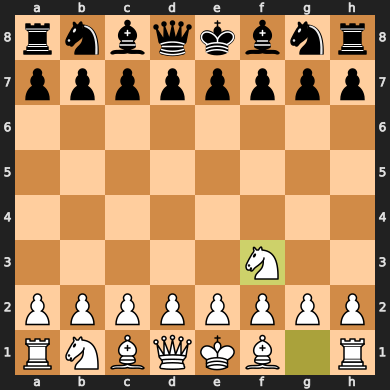

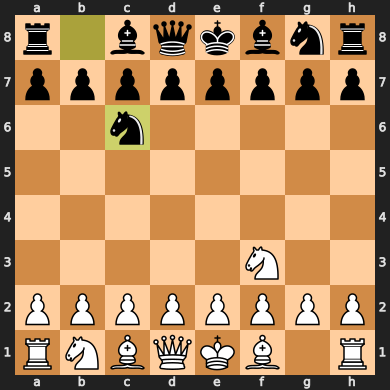

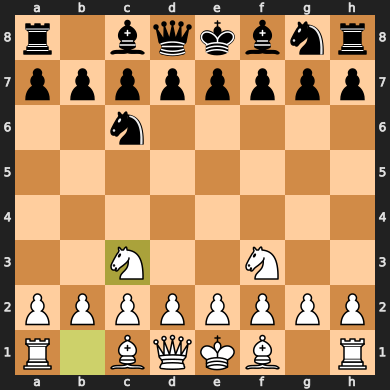

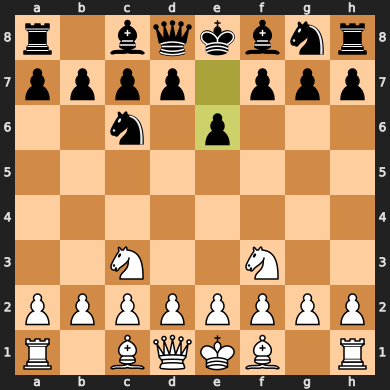

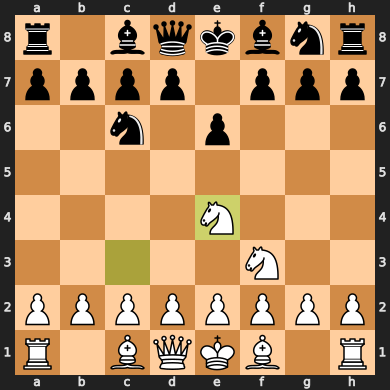

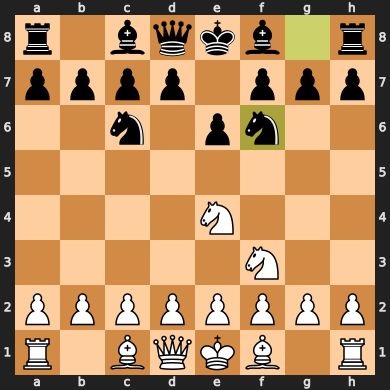

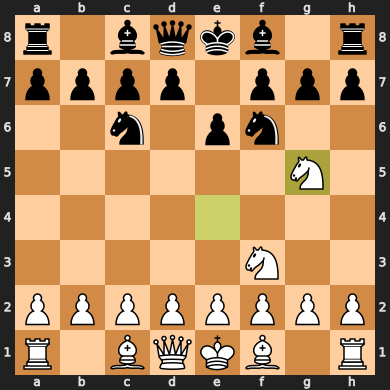

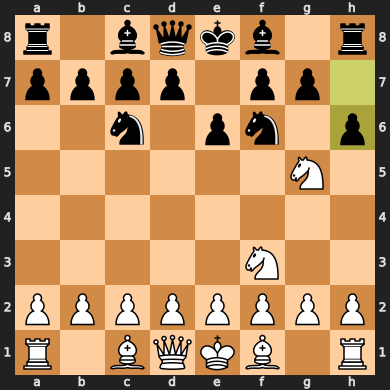

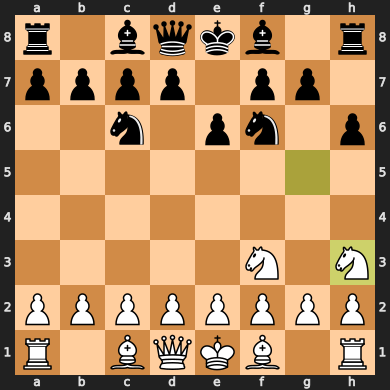

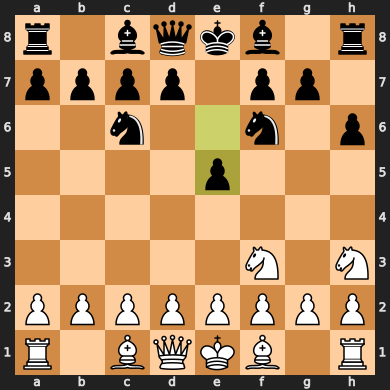

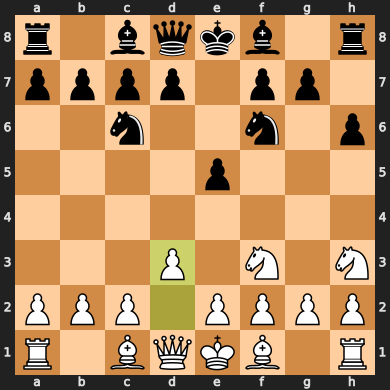

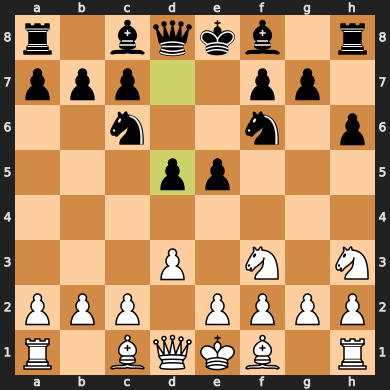

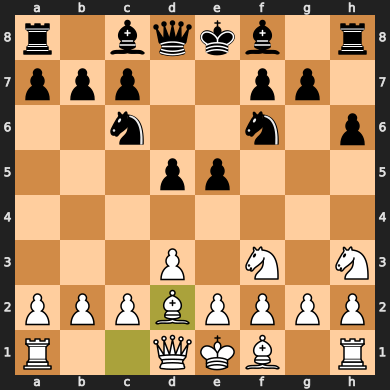

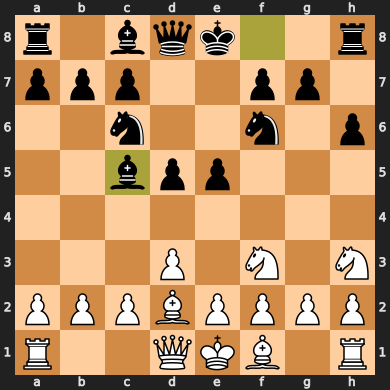

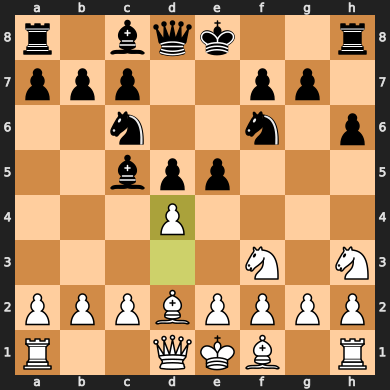

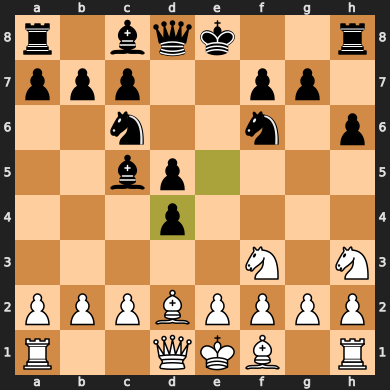

In [ ]:
# This chess game is really bad
# I need to improve the evaluation function and the weights so this thing actually plays good chess.
fen = "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1"
board = chess.Board(fen)

while(not board.is_game_over()):
  best_move = get_best_move(fen, depth=4)
  board.push(best_move)
  fen = board.fen()
  display(board)

In [ ]:
#fen = "5B2/6P1/1p6/8/1N6/kP6/2K5/8 w - - 0 1"
fen = "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1"
board = chess.Board(fen)
counter = 0
while(not board.is_game_over()):
 # if(counter==3):
 #   break
  best_move = get_best_move(fen, depth=3)
  board.push(best_move)
  fen = board.fen()
  display(board)
  counter+=1

In [ ]:
fen1 = "r1bqkbnr/pppppppp/2n5/8/4N3/5N2/PPPP1PPP/R1BQKB1R b KQkq - 0 1"
fen2 = "r1bqkbnr/pppppppp/2n5/1N6/4P1n1/5N2/PPPP1PPP/R1BQKB1R b KQkq - 0 1"
fen3 ="8/7K/5Q2/3R4/8/8/k7/8 b - - 0 1"
board1 = chess.Board(fen1)
board2 = chess.Board(fen2)
board3 = chess.Board(fen3)
print("total = ", evaluate(fen1, optimal_organism_parameters, True))
display(board1)
print("total = ",evaluate(fen2, optimal_organism_parameters, True))
display(board2)
print("total = ",evaluate(fen3, optimal_organism_parameters, True))
display(board3)

In [ ]:
fen1 = "r1bqkbnr/pppppppp/2n5/8/4N3/5N2/PPPP1PPP/R1BQKB1R w KQkq - 0 1"
fen2 = "r1bqkbnr/pppppppp/2n5/1N6/4P1n1/5N2/PPPP1PPP/R1BQKB1R w KQkq - 0 1"
fen3 ="8/7K/5Q2/3R4/8/8/k7/8 w - - 0 1"
board1 = chess.Board(fen1)
board2 = chess.Board(fen2)
board3 = chess.Board(fen3)
print("total = ", evaluate(fen1, optimal_organism_parameters, True))
display(board1)
print("total = ",evaluate(fen2, optimal_organism_parameters, True))
display(board2)
print("total = ",evaluate(fen3, optimal_organism_parameters, True))
display(board3)

## Random Testing

In [ ]:
fen = "r1bqkb1r/pppppppp/2n2n2/8/4P3/2N2N2/PPPP1PPP/R1BQKB1R b KQkq - 0 1"
board = chess.Board(fen)
#display(board)
current_best_move = list(board.legal_moves)[0]
board.push(current_best_move)
current_best_evaluation = evaluate(board.fen(), optimal_organism_parameters, True)
board.pop
board = chess.Board(fen)
for move in board.legal_moves:
  board = chess.Board(fen)
  board.push(move)
  #display(board)
  evaluation = evaluate(board.fen(), optimal_organism_parameters, True)
  #print("Move: ", move)
  #print("Evaluation:", evaluation)
  if evaluation > current_best_evaluation:
    current_best_evaluation = evaluation
    current_best_move = move

board.pop
#print("Best Move: ", current_best_move)
#print("Best Move Evaluation: ", current_best_evaluation)
board = chess.Board(fen)
board.push(current_best_move)
#display(board)

# Nxe4 has a value of 1250
# g5 has a value of 1275, b5?
# Pawn to e5 has a value of 1295
# Mobility is the issue!